# 0010-SRT-pilot

This is a simple serial reaction time tast (SRT) in which participants see a screen with 4 circles.  When a circle fills, they must touch the corresponding keyboard button (z, x, n, m) as quickly and accurately as possible.  We measure their accuracy and reaction time over 20 blocks of 80 trials.  Faster reaction times reveal learning.

- [Details](##Introduction)
- [Materials and method](##Materials-and-Method)
- [Results and analysis]()

## Details

- author: Kathryn Schuler 
- with: Elissa Newport, Darlene Howard, and Jim Howard
- lab manager: Katherine Olson  
- research assistants: Jason Sotomayor
- data collection: October 23, 2012 to November 15, 2012   



## Introduction

0010-SRT-pilot was the first experiment Lissa and I ever conducted at Georgetown.  We wanted to see if we could replicate the Howard's SRT task in our own lab.  We began with this simple regular serial reaction time task (SRT), where every transition in the pattern was 100% predictable (i.e. a series of 8 button presses repeated over and over again).






## Materials and Method

### Subjects
- 20 GU undergrads (2 excluded for not finishing)
- Conducted in the Newport Lab
- Compensated $10 

### Materials
- Hardware: Mac-mini, keyboard
- Software: PsychoPy, Python
- 4 circles aligned horizontally across the screen each of which corresponds to 4 keyboard buttons [z,x,n,m]
- Each participant assigned to a series of 8 button presses that would repeat over and over (SRT)

### Procedure
- Circles fill green according to the serial pattern the participant was assigned to
- Participants must press the keyboard button that corresponds to the illuminated circle.
- They are instructed to work as quickly and as accurately as possible.
- Every 80 trials (1 block) subjects are given a 60 second break.  They complete 20 blocks.

In [83]:
# load the R libraries we need
library(ggplot2)
#install.packages("doBy", repos = "http://cran.rstudio.com/")
library(doBy)

# adjust figure output size
options(repr.plot.width = 4)
options(repr.plot.height = 3)


The downloaded source packages are in
	‘/private/var/folders/6s/vgfr3wvx6nd056hnyh9lvspc0000gn/T/RtmpnMANzD/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Results and Analysis

Data analysis was conducted with R.  In this (and all) SRT experiments, we perform three main analyses.
- Accuracy: Does participant accuracy change as a function of time?
- Raw RT: Does raw reaction time change as a function of time?
- z-transformed RT: We z-transform as a way of normalizing RT data, an analyze zRT as a function of time.

We begin by loading necessary packages and adjusting figure size.

### Accuracy
Before we computer accuracy, we need to clean our data a little bit.  With reaction time data, there isn't really a "standard" procedure. Some people do 2SD from the mean, some make some cutoff threshold, etc.  I like to just visually inspect the data to make sure there aren't any major outliers.

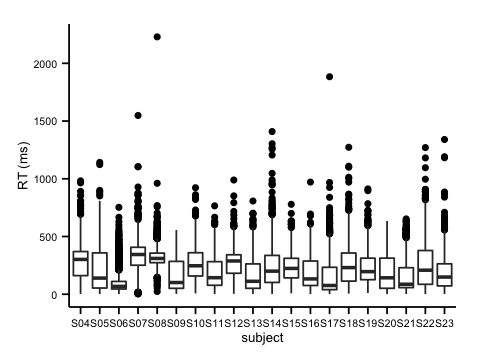

In [84]:
# load data
df = read.csv("processed-data/0010-srt-pilot-processed-data.csv")

# convert seconds to ms
df$RT = df$RT*1000

# boxplot to inspect for outliers
ggplot(df, aes(x=sid, y=RT)) + geom_boxplot() + theme_classic(8) + xlab('subject') + ylab('RT (ms)')

There do not appear to a whole lot of outliers, but we can clean it up a little bit anyway.  Let's use 1000ms as our cutoff value (this is a frequent cutoff value in the literature), and calculate how much data we lose to make sure it is reasonable.

In [85]:
# remove trials with RT greater than or equal to 1000ms
df.1 = subset(df, RT <= 1000)

# figure out how much data was lost
n.outliers = nrow(df) - nrow(df.1)
data.loss = n.outliers/nrow(df) * 100 
cat("Number of outliers: ", n.outliers, "  Data loss: ", data.loss, "%")

Number of outliers:  24   Data loss:  0.075 %

So barely any data was lost.  That seems reasonable. Let's go ahead and compute accuracy for all of the participants.

In [86]:
# make function for percent correct (pcntc)
pcnt.correct = function (x) return (sum(x)/length(x)*100)


# get the overall accuracy for each subject 
overall.acc = summaryBy(isCorrect ~ sid, data = df.1, FUN = pcnt.correct)
print(overall.acc)

   sid isCorrect.pcnt.correct
1  S04               86.81250
2  S05               96.93367
3  S06               92.81250
4  S07               92.86162
5  S08               86.05378
6  S09               96.43750
7  S10               87.75000
8  S11               86.12500
9  S12               97.06250
10 S13               85.18750
11 S14               90.58971
12 S15               92.06250
13 S16               93.68750
14 S17               64.35272
15 S18               93.91850
16 S19               92.87500
17 S20               86.81250
18 S21               91.18750
19 S22               91.35880
20 S23               94.55229


Now we will remove any subjects who had an accuracy of below 80% and plot mean accuracy (% correct) by block.

In [87]:
# remove subjects below 80%
df.2 = subset(df.1, sid != "S17")

# Check how much data was lost
n.outliers = nrow(df.1) - nrow(df.2)
data.loss = n.outliers/nrow(df.1) * 100 
cat("Number of outliers: ", n.outliers, "  Data loss: ", data.loss, "%")

Number of outliers:  1599   Data loss:  5.000625 %

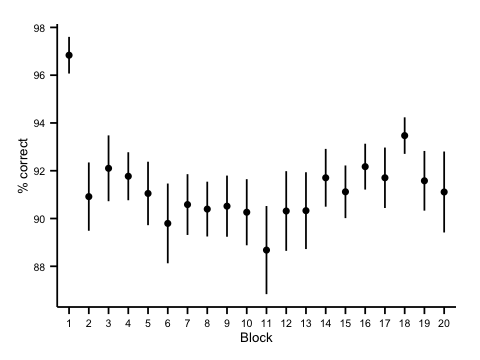

In [88]:
# accuracy by subject by block
acc.sid.block = summaryBy(isCorrect ~ sid*block, data = df.2, FUN = pcnt.correct )

# plot % correct by block
ggplot(acc.sid.block, aes(factor(block), isCorrect.pcnt.correct)) +
    stat_summary(fun.data = mean_se, size = 0.5, geom="pointrange", position = "dodge") +
    theme_classic(8) + theme(legend.position = "bottom") +
    xlab("Block") + ylab("% correct") 

In [ ]:
# mixed effects model

### Raw RT
To analyze the raw RT data, we first remove any incorrect trials, as recommended by Howard & Howard, 1997.

In [89]:
# remove incorrect trials
df.3 = subset(df.2, isCorrect == 1)

# Check how much data was lost 
n.outliers = nrow(df.2) - nrow(df.3)
data.loss = n.outliers/nrow(df.2) * 100 
cat("Number of outliers: ", n.outliers, "  Data loss: ", data.loss, "%")


Number of outliers:  2637   Data loss:  8.68091 %

With the cleaned data set, calcuate median RT for each participant for each block (Howard & Howard, 1997)

ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y i

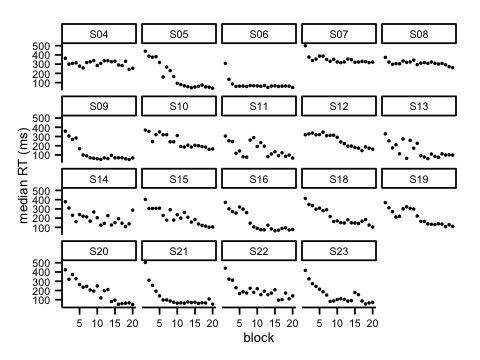

In [100]:
# individual subject data for mean of median RT
medianRT = summaryBy(RT ~ sid*block, data = df.3, FUN = median)

ggplot(medianRT, aes(block, RT.median)) + geom_point(stat="identity", position = "dodge", size = 1) +
    facet_wrap(~sid) + theme_classic(base_size=8) + ylab("median RT (ms)")

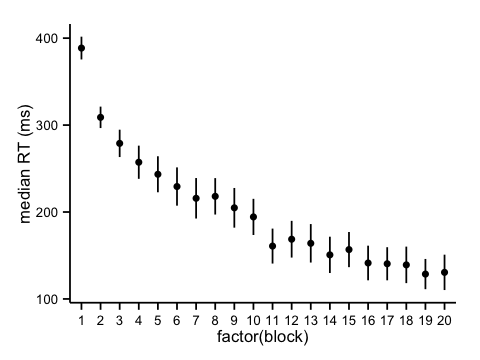

In [105]:
# and then we can plot the mean of median RT
ggplot(medianRT, aes(factor(block), RT.median)) + 
    stat_summary(fun.data=mean_se, size = 0.5, geom= "pointrange", position = "dodge") +
    theme_classic(base_size=10) + ylab("median RT (ms)")
